# 8.3.2 Fitting Regression Trees

In [1]:
library(tree)
library(ISLR2)
attach(Carseats)
High <- factor(ifelse(Sales <= 8, "No", "Yes"))

Here we fit a regression tree to the `Boston` data set. First, we create a training set, and fit the tree to the training data.

In [2]:
set.seed(1)
train <- sample(1:nrow(Boston), nrow(Boston) / 2)
tree.boston <- tree(medv ~ ., Boston, subset = train)
summary(tree.boston)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "rm"    "lstat" "crim"  "age"  
Number of terminal nodes:  7 
Residual mean deviance:  10.38 = 2555 / 246 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.1800  -1.7770  -0.1775   0.0000   1.9230  16.5800 

Notice that the output of `summary()` indicates that only four of the variables have been used in constructing the tree. In the context of a regression tree, the deviance is simply the sum of squared errors for the tree. We now plot the tree.

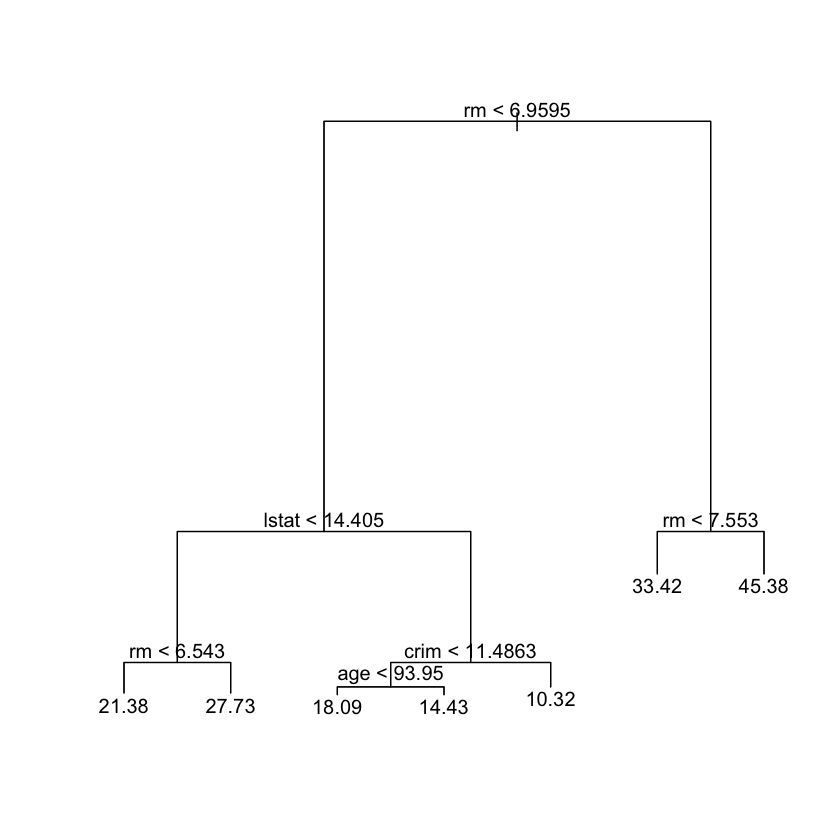

In [3]:
plot(tree.boston)
text(tree.boston, pretty = 0)

The variable `lstat` measures the percentage of individuals with lower socioeconomic status, while the variable `rm` corresponds to the average number of rooms. The tree indicates that larger values of `rm`, or lower values of `lstat`, correspond to more expensive houses. For example, the tree predicts a median house price of $\$45,400$ for homes in census tracts in which `rm >= 7.553`.

It is worth noting that we could have fit a much bigger tree, by passing `control = tree.control(nobs = length(train), mindev = 0)` into `tree()` function.

Now we use the `cv.tree()` function to see whether pruning the tree will improve performance.

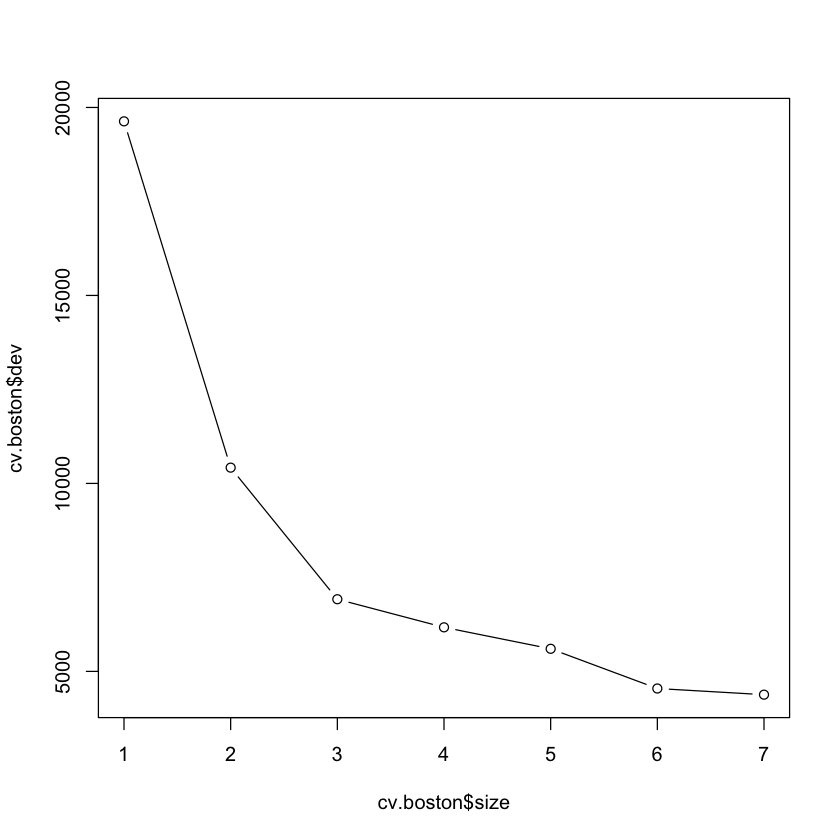

In [4]:
cv.boston <- cv.tree(tree.boston)
plot(cv.boston$size, cv.boston$dev, type = "b")

In this case, the most complex tree under consideration is selected by cross-validation. However, if we wish to prune the tree, we could do so as follows, using the `prune.tree()` function:

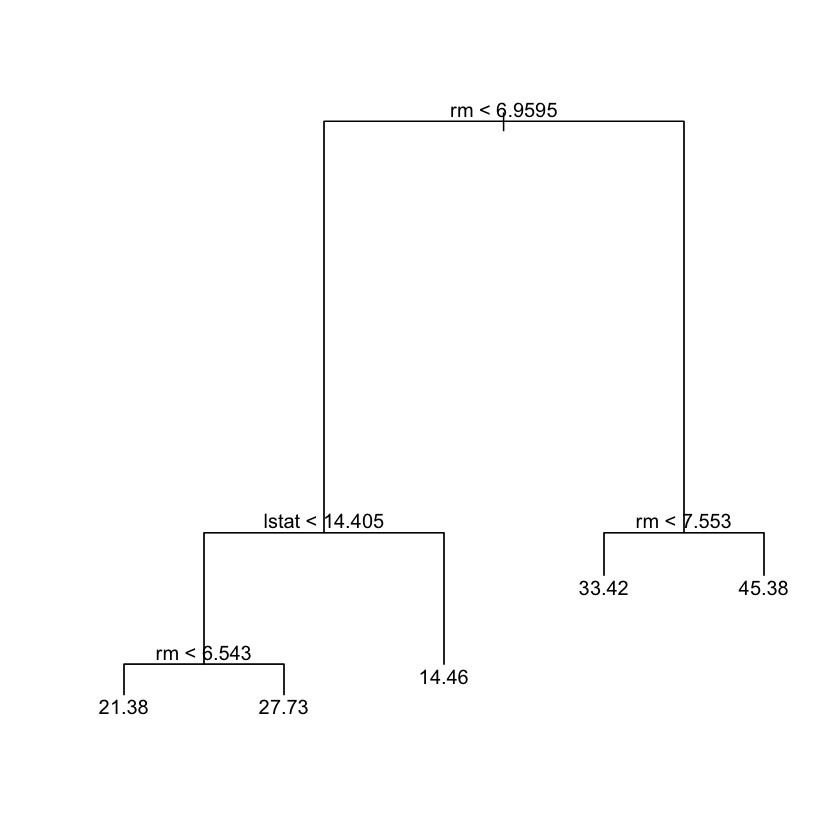

In [5]:
prune.boston <- prune.tree(tree.boston, best = 5)
plot(prune.boston)
text(prune.boston, pretty = 0)

In keeping with the cross-validation results, we use the unpruned tree to make predictions on the test set.

[1] 35.28688

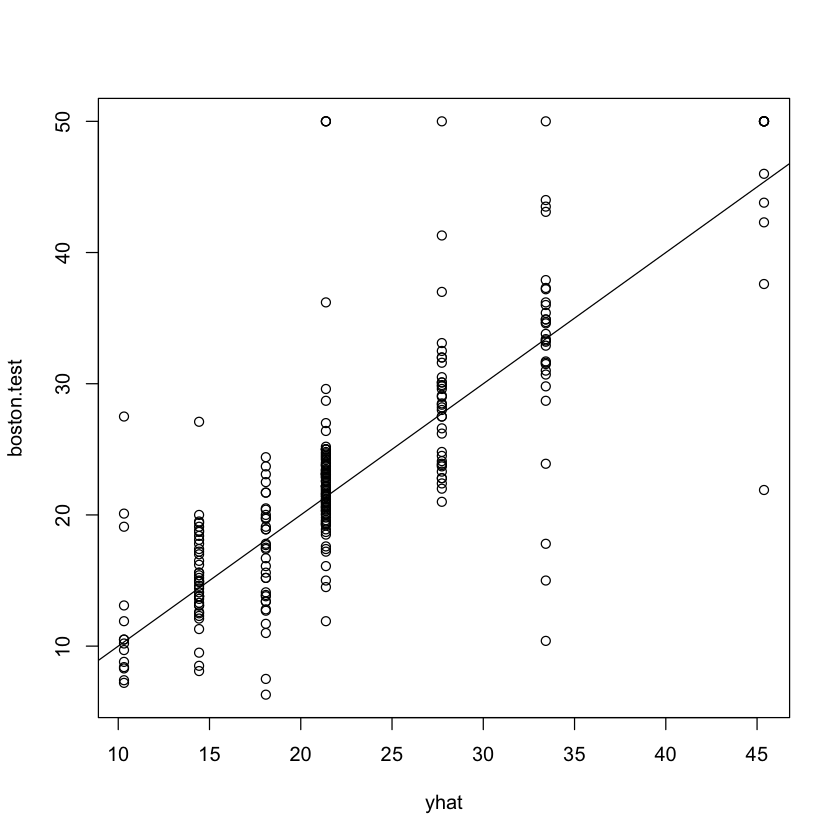

In [6]:
yhat <- predict(tree.boston, newdata = Boston[-train,])
boston.test <- Boston[-train, "medv"]
plot(yhat, boston.test)
abline(0, 1)
mean((yhat - boston.test)^2)

In other words, the test set MSE associated with the regression tree is $35.29$. The square root of the MSE is therefore around $5.941$, indicating that this model leads to test predictions that are (on average) within approximately $\$5,941$ of the true median home value for the census tract.